In [ ]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.io as io
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_height = 352
img_width = 480

In [ ]:
list_train_file = glob('/content/drive/MyDrive/CamVid/train/*.png')

# Preload images and segmentation masks
train_images = []
train_masks = []
for i in range(len(list_train_file)):
    img_filename = list_train_file[i]
    seg_filename = list_train_file[i].replace('/train/','/train_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)
    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)

    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))
    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    train_images.append(img)
    train_masks.append(seg)

train_images = np.stack(train_images)
train_masks = np.stack(train_masks)

def load_train_img(index):
    img_tr = train_images[index]
    seg_tr = train_masks[index]
    return img_tr, seg_tr
%whos

Variable             Type        Data/Info
------------------------------------------
ImageDataGenerator   type        <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
cv2                  module      <module 'cv2' from '/usr/<...>ackages/cv2/__init__.py'>
drive                module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
glob                 function    <function glob at 0x7fbf04534670>
i                    int         368
img                  ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_filename         str         /content/drive/MyDrive/Ca<...>/train/Seq05VD_f04920.png
img_height           int         352
img_width            int         480
io                   module      <module 'skimage.io' from<...>/skimage/io/__init__.py'>
keras                module      <module 'keras.api._v2.ke<...>i/_v2/keras/__init__.py'>
list_train_file      list        n=369
load_train_img       function    <function load_train_img a

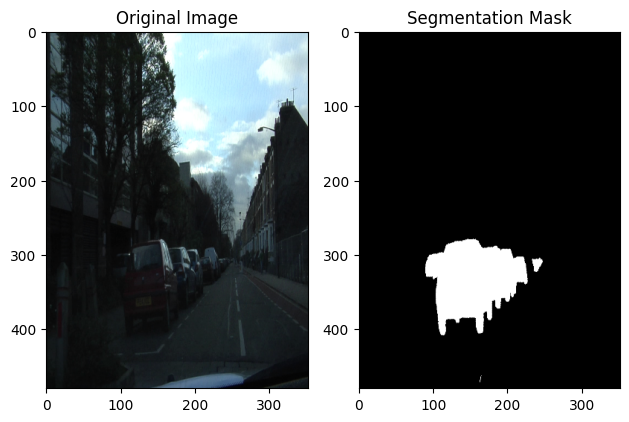

In [ ]:
# Select the index of the image you want to visualize
index = 2

# Load the image and segmentation mask
img_tr, seg_tr = load_train_img(index)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_tr)
seg_arr = np.squeeze(seg_tr)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Original Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [ ]:

list_val_file = glob('/content/drive/MyDrive/CamVid/val/*.png')


# Preload images and segmentation masks
val_images = []
val_masks = []
for i in range(len(list_val_file)):
    img_filename = list_val_file[i]
    seg_filename = list_val_file[i].replace('/val/','/val_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)


    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)
    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))

    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    val_images.append(img)
    val_masks.append(seg)



val_images = np.stack(val_images)
val_masks = np.stack(val_masks)



def load_val_img(index):
    img_v = val_images[index]
    seg_v = val_masks[index]
    return img_v, seg_v

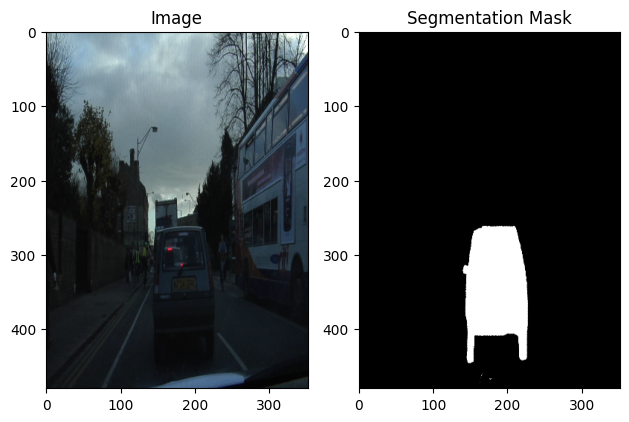

In [ ]:
# Load the image and segmentation mask
img_v,seg_v = load_val_img(0)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_v)
seg_arr = np.squeeze(seg_v)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [ ]:
list_test_file = glob('/content/drive/MyDrive/CamVid/test/*.png')



# Preload images and segmentation masks
test_images = []
test_masks = []
for i in range(len(list_test_file)):
    img_filename = list_test_file[i]
    seg_filename = list_test_file[i].replace('/test/','/test_labels/')[:-4]+'_L.png'
    # Load the image
    img = np.float32(io.imread(img_filename)) / 255

    # Resize the image to half of its original size
    img = cv2.resize(img, (img_height, img_width))

    # Load the segmentation mask
    seg = io.imread(seg_filename)



    seg = (seg[:,:,0]==64) & (seg[:,:,1]==0) & (seg[:,:,2]==128)
    seg = np.float32(seg)
    # Resize the segmentation mask to half of its original size
    seg = cv2.resize(seg, (img_height, img_width))

    seg = np.reshape(seg, (seg.shape[0], seg.shape[1], 1))

    test_images.append(img)
    test_masks.append(seg)



test_images = np.stack(test_images)
test_masks = np.stack(test_masks)



def load_test_img(index):
    img_t = test_images[index]
    seg_t = test_masks[index]
    return img_t, seg_t


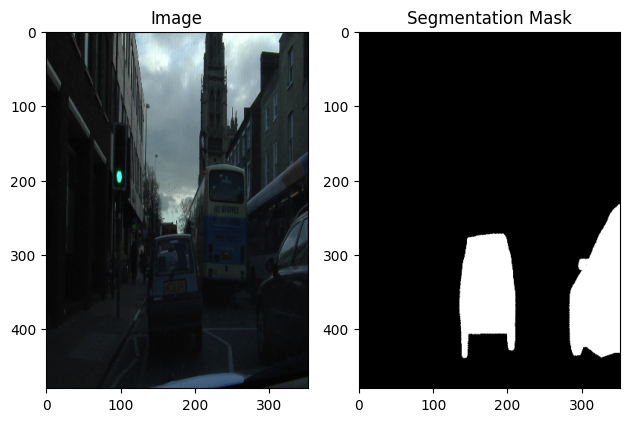

In [ ]:
# Load the image and segmentation mask
img_t,seg_t = load_test_img(0)

# Convert image and mask to numpy arrays
img_arr = np.squeeze(img_t)
seg_arr = np.squeeze(seg_t)

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(img_arr)
plt.title('Image')

# Plot the segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(seg_arr, cmap='gray')
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [ ]:
%whos

Variable             Type        Data/Info
------------------------------------------
ImageDataGenerator   type        <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
cv2                  module      <module 'cv2' from '/usr/<...>ackages/cv2/__init__.py'>
drive                module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
glob                 function    <function glob at 0x7fbf04534670>
i                    int         231
img                  ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_arr              ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_filename         str         /content/drive/MyDrive/Ca<...>d/test/Seq05VD_f05040.png
img_height           int         352
img_t                ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
img_tr               ndarray     480x352x3: 506880 elems, type `float32`, 2027520 bytes (1.93359375 Mb)
i

In [ ]:
from unet import UNet
model = UNet(input_shape=(None,None,3),num_output =1)

In [ ]:
from unet import iou_metric
from tensorflow import keras
model.compile(loss = keras.losses.binary_crossentropy,
   optimizer = keras.optimizers.Nadam(learning_rate=0.001),
    metrics=[iou_metric,])


In [ ]:
from re import VERBOSE
model.fit(train_images,train_masks,batch_size=12,epochs=100,
          validation_data=(val_images,val_masks),verbose=True)

Epoch 1/100
31/31 [==============================] - 190s 4s/step - loss: 1.3136 - iou_metric: 5.8981e-04 - val_loss: 0.1640 - val_iou_metric: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 83s 3s/step - loss: 0.1266 - iou_metric: 1.8332e-06 - val_loss: 0.1104 - val_iou_metric: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 83s 3s/step - loss: 0.1111 - iou_metric: 7.6145e-04 - val_loss: 0.0930 - val_iou_metric: 8.5128e-04
Epoch 4/100
31/31 [==============================] - 77s 2s/step - loss: 0.6803 - iou_metric: 0.0025 - val_loss: 0.1752 - val_iou_metric: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 76s 2s/step - loss: 0.3521 - iou_metric: 0.0010 - val_loss: 0.1702 - val_iou_metric: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 76s 2s/step - loss: 0.1651 - iou_metric: 0.0000e+00 - val_loss: 0.1284 - val_iou_metric: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 76s 2s/step - loss: 0.1197 - iou_met

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   36928       ['conv2d[0][0]']                 
                                64)                                                           

In [ ]:

# Save the weights to a file
model.save_weights('model_weights.h5')

In [ ]:
# Load the saved weights into the model
model.load_weights('model_weights.h5')